In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
files=!ls ../../input/feat/train_seq_coverage_*_fwv_*.parq |grep -v pca

In [3]:
files

['../../input/feat/train_seq_coverage_18_fwv_offset_0.parq',
 '../../input/feat/train_seq_coverage_18_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_19_fwv_offset_0.parq',
 '../../input/feat/train_seq_coverage_19_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_20_fwv_offset_0.parq',
 '../../input/feat/train_seq_coverage_20_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_21_fwv_offset_0.parq',
 '../../input/feat/train_seq_coverage_21_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_22_fwv_offset_0.parq',
 '../../input/feat/train_seq_coverage_22_fwv_offset_125.parq']

In [4]:
lst={}
for u in files:
    if '125.parq' in u:
        v = u.replace('125.parq','0.parq')
        a=fastparquet.ParquetFile(u).to_pandas()
        b=fastparquet.ParquetFile(v).to_pandas()
        c=(a+b)/2.0
        assert c.shape==b.shape
        assert c.shape==a.shape
        lst[u]=c
        

In [5]:
list(lst.keys())

['../../input/feat/train_seq_coverage_18_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_19_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_22_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_21_fwv_offset_125.parq',
 '../../input/feat/train_seq_coverage_20_fwv_offset_125.parq']

In [6]:
df=pd.concat(lst.values())

In [7]:
df.index.value_counts().value_counts()

1    419137
2       111
Name: index, dtype: int64

In [8]:
df= df[~df.index.duplicated(keep='first')]

In [9]:
df.index.value_counts().value_counts()

1    419248
Name: index, dtype: int64

In [10]:
df.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [11]:
qdf=pd.DataFrame(df.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=df.index)
qdf=qdf[~qdf['index'].isin({0,16})]
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [12]:
qdf['index'].value_counts().to_frame().sort_index().T

1      2      3      4      5      6      7      8      9      10  \
index  29606  36381  22721  32572  20661  18112  41320  20285  24722  29316   

          11     12     13     14     15  
index  28282  22648  21974  37848  24269

In [13]:
df=df.loc[qdf.index]

In [14]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 2: 36381, 3: 22721, 4: 32572, 5: 20661, 6: 18112, 7: 41320, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 14: 37848, 15: 24269}'

In [15]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [118]:
def make_distance(trainX,testX):
    a=np.expand_dims(trainX,1)
    print a.shape
    b=np.expand_dims(testX,0)
    print b.shape
    c=a-b
    print c.shape
    d=np.sqrt(np.sum(c*c, axis=2))
    print  d.shape
    return d
def make_distance2(trainX,testX):
    lst =[] 
    for i in range(len(testX)):
        x=testX[i:i+1]
        c=trainX-x
        d=np.sqrt(np.sum(c*c, axis=1))
        #print c.shape,x.shape,trainX.shape,d.shape        
        lst.append(d)
    return np.array(lst).T
def dmean2(a,n, y):
    a=(a-np.mean(a))/np.std(a)
    a=np.exp(-a)
    a=a/np.sum(a)
    return np.sum(a*y)
def dmean(v,ns,rawy):
    if not isinstance(ns, list):
        ns=[ns]
    for n in ns:
        assert n>0
    aindex=np.argsort(v) 
    lst=[]
    for n in ns:
        a=aindex[:n]
        y=rawy[a]
        a=(a-np.mean(a))/np.std(a)
        a=np.exp(-a)
        a=a/np.sum(a)
        r=np.sum(a*y)
        lst.append(r)
    return lst

In [115]:
results={}

In [119]:
%%time 
for qno in quakes:
    print qno
    testdf=df[qdf['index']==qno].sample(3000)
    testX=testdf.drop('y',1).values
    testy=testdf['y'].values
    print "test", testX.shape,testy.shape
    
    traindf=df[qdf['index']<>qno]
    trainX=traindf.drop('y',1).values
    trainy=traindf['y'].values
    print "train", trainX.shape,trainy.shape

    distances=make_distance2(trainX,testX)
    print distances.shape

    ns=range(10,2000,10)
    predy=np.apply_along_axis(lambda u: dmean(u,ns,trainy),axis=0,arr=distances)
    predy=np.array(predy)
    print predy.shape

    tmp=[]
    for i,p in zip(ns,predy):
        tmp.append([i, np.mean(np.abs(testy-p))])
    tmp=np.array(tmp).T
    print tmp.shape
    results[qno]=tmp
    #break

1
test (3000, 100) (3000,)
train (381111, 100) (381111,)
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
(381111, 3000)
(199, 3000)
(2, 199)
2
test (3000, 100) (3000,)
train (374336, 100) (374336,)
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
(374336, 3000)
(199, 3000)
(2, 199)
3
test (3000, 100) (3000,)
train (387996, 100) (387996,)
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs
(387996, 3000)
(199, 3000)
(2, 199)
4
test (3000, 100) (3000,)
train (378145, 100) (378145,)
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
(378145, 3000)
(199, 3000)
(2, 199)
5
test (3000, 100) (3000,)
train (390056, 100) (390056,)
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
(390056, 3000)
(199, 3000)
(2, 199)
6
test (3000, 100) (3000,)
train (392605, 100) (392605,)
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
(392605, 3000)
(199, 3000)
(2, 199)
7
test (3000, 100) (3000,)
train (369397, 100) (36

In [126]:
tmp=[]
for k,v in results.items():
    for a,b in v.T:
        tmp.append([k,a,b])
rdf=pd.DataFrame(tmp)
rdf.columns=['qno','n','score']
rdf['n']=rdf['n'].astype(np.int)

In [129]:
rdf=rdf.pivot_table(values='score',index="n",columns='qno')

In [142]:
rdf.min().sort_values()

qno
11    1.167470
9     1.275683
10    1.339019
1     1.470122
3     1.616122
12    1.704518
13    1.990019
4     2.047180
15    2.384705
2     2.747566
5     2.761580
8     2.997760
6     3.108581
14    3.156965
7     3.746397
dtype: float64

In [143]:
rdf.min().sort_values().mean()

2.234245859849814

In [146]:
rdf.min().to_frame().T

qno        1         2         3        4        5         6         7   \
0    1.470122  2.747566  1.616122  2.04718  2.76158  3.108581  3.746397   

qno       8         9         10       11        12        13        14  \
0    2.99776  1.275683  1.339019  1.16747  1.704518  1.990019  3.156965   

qno        15  
0    2.384705

In [140]:
rdf.apply(lambda u: rdf.index[np.argsort(u.values)[0]],axis=0)

qno
1     1050
2     1940
3     1980
4      340
5     1990
6     1990
7      540
8     1960
9     1990
10    1980
11    1990
12    1990
13    1870
14    1140
15    1990
dtype: int64

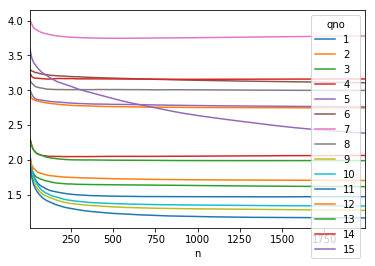

In [141]:
rdf.plot()